In [1]:
%matplotlib notebook

from numpy import *
from scipy import signal
from scipy.signal import filter_design as fd
from matplotlib import pyplot as plt


In [2]:
# Specification for our filter
Wp = 0.270   # end of passband, normalized frequency
Ws = 0.412   # start of the stopband, normalized frequency 
Rp = 0.1     # passband maximum loss (gpass)
As = 60      # stopband min attenuation (gstop)

Filters = {'ellip' : (), 'cheby2' : ()}

# The ellip and cheby2 filter design
Filters['ellip'] = fd.iirdesign(Wp, Ws, Rp, As, ftype='ellip')
Filters['cheby2'] = fd.iirdesign(Wp, Ws, Rp, As, ftype='cheby2')

<IPython.core.display.Javascript object>


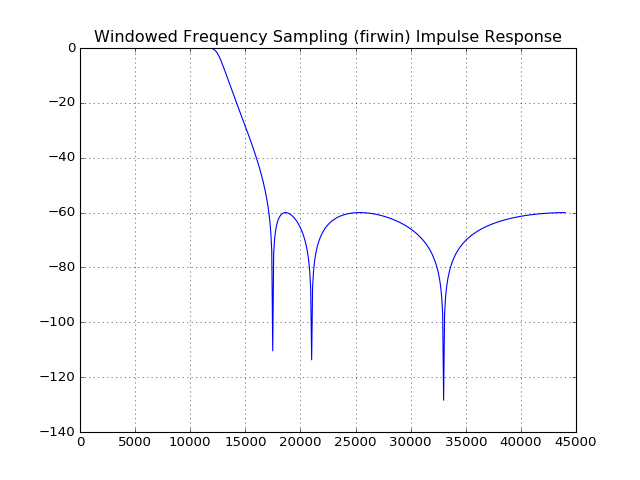

In [3]:
(w,H) = signal.freqz(*Filters['ellip'])

f, ax = plt.subplots()
ax.plot(w/pi*44100, 20*log10(abs(H)))
ax.set_title('Windowed Frequency Sampling (firwin) Impulse Response')
ax.grid(True)

In [4]:
Filters['ellip'][0],Filters['ellip'][1]

(array([ 0.00685858,  0.00424427,  0.01363637,  0.00939893,  0.01363637,
         0.00424427,  0.00685858]),
 array([ 1.        , -3.6133816 ,  6.29949582, -6.44744259,  4.04658649,
        -1.4649745 ,  0.23927553]))

In [28]:
signal.freqz(Filters['ellip'][0],Filters['ellip'][1], [0.1,0.2,0.3,0.4,0.5])

(array([ 0.1,  0.2,  0.3,  0.4,  0.5]),
 array([ 0.91261570-0.38885569j,  0.68077424-0.7302379j ,
         0.30448503-0.95181804j, -0.15483488-0.98057834j,
        -0.60538384-0.78165398j]))

In [29]:
Filters['cheby2'][0], Filters['cheby2'][1]

(array([ 0.00808849,  0.01274588,  0.02964752,  0.03914383,  0.04847241,
         0.04847241,  0.03914383,  0.02964752,  0.01274588,  0.00808849]),
 array([  1.00000000e+00,  -2.82266996e+00,   4.63931876e+00,
         -4.76100316e+00,   3.46613856e+00,  -1.74783473e+00,
          6.29294188e-01,  -1.47517332e-01,   2.18161830e-02,
         -1.34624260e-03]))

<IPython.core.display.Javascript object>


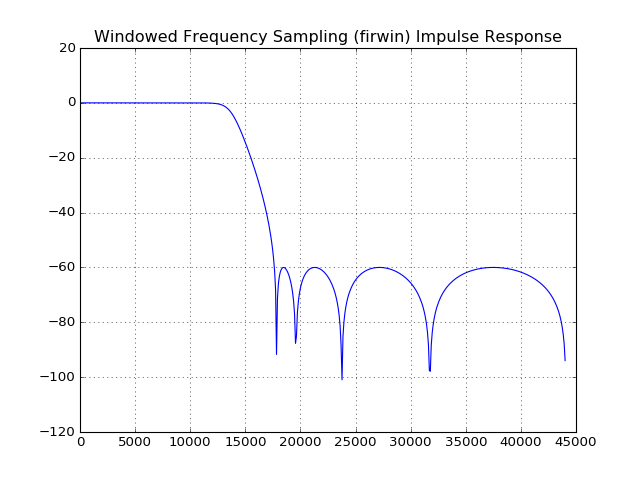

In [32]:
(w,H) = signal.freqz(*Filters['cheby2'])

f, ax = plt.subplots()
ax.plot(w/pi*44100, 20*log10(abs(H)))
ax.set_title('Windowed Frequency Sampling (firwin) Impulse Response')
ax.grid(True)